In [247]:
dataset_names = {0:'usps',\
                 1:'satimage.scale',\
                 2:'dna.scale',\
                 3:'letter.scale',\
                 4:'pendigits',\
                 5:'news20.scale',\
                 6:'sector.scale',\
                 7:'mnist.scale',\
                 8:'cifar10',\
                 9:'toy',\
                 10:'rcv1',\
                 11:'aloi.scale'\
                }

nr_classes = {'usps':10,\
              'satimage.scale':6,\
              'dna.scale':3,\
              'letter.scale':26,\
              'pendigits':10,\
              'news20.scale':20,\
              'sector.scale':105,\
              'mnist.scale':10,\
              'cifar10':10,\
              'toy':3,\
              'rcv1':53,\
              'aloi.scale':1000\
             }

# as powers of ten
regs = {'usps':.1,\
        'satimage.scale':1,\
        'dna.scale':1,\
        'letter.scale':.1,\
        'pendigits':.01,\
        'news20.scale':.1,\
        'sector.scale':1,\
        'mnist.scale':1,\
        'cifar10':1,\
        'toy':1,\
        'rcv1':1,\
        'aloi.scale':1\
       }


iters = {'usps':2048,\
         'satimage.scale':64,\
         'dna.scale':1024,\
         'letter.scale':64,\
         'pendigits':8192,\
         'news20.scale':64,\
         'sector.scale':32,\
         'mnist.scale':64,\
         'cifar10':32,\
         'toy':32,\
         'rcv1':32,\
         'aloi.scale':32\
       }




run_these_datasets = [2,1,7,5,3,10,6,11]
run_these_hyperparams = [10,1,0.1,0.01]




In [248]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import re
import math
import pandas as pd

In [249]:
pd.DataFrame({'ds_name' : [dataset_names[i] for i in run_these_datasets],
              'ds_idx' : run_these_datasets,
             'nr_classes' : [nr_classes[dataset_names[i]] for i in run_these_datasets]})

,ds_name,ds_idx,nr_classes
0,dna.scale,2,3
1,satimage.scale,1,6
2,mnist.scale,7,10
3,news20.scale,5,20
4,letter.scale,3,26
5,rcv1,10,53
6,sector.scale,6,105
7,aloi.scale,11,1000


In [250]:
ds = dataset_names[11]
reg = 1

In [251]:
def get_exp_name(ds, reg):
    return ds+'_'+ str(int(math.log10(reg)))

In [252]:
def get_results(FILENAME):
    from numpy import genfromtxt
    result_np = genfromtxt(FILENAME, delimiter=',')

    df = pd.DataFrame(result_np, columns = ['time', 'sum of dual vars', 'norm/2', 'C*hinge risk', 'primal obj'])

    df['time'] = df['time']/1000 # convert from milliseconds to seconds
    df['dual obj'] = df['sum of dual vars'] - df['norm/2'] # add the column for the dual obj
    df['duality gap'] = df['primal obj'] - df['dual obj']
    return df

In [253]:
def get_time_conv(df):
    idx_conv = (df['duality gap'] <= 0.01*df['duality gap'][0]).idxmax()
    return df['time'][idx_conv]

In [254]:
FILENAME = "../results/Ours/" + get_exp_name(ds,reg) + '.csv'
df_ours = get_results(FILENAME)
t_ours = get_time_conv(df_ours)

In [255]:
FILENAME = "../results/Shark/" + get_exp_name(ds,reg) + '.csv'
df_shark = get_results(FILENAME)
t_shark = get_time_conv(df_shark)

In [256]:
t_shark/t_ours

3.8656659859792417

In [262]:
df_ours['duality gap'] <= 0.01*df_ours['duality gap'][0]

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
Name: duality gap, dtype: bool

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


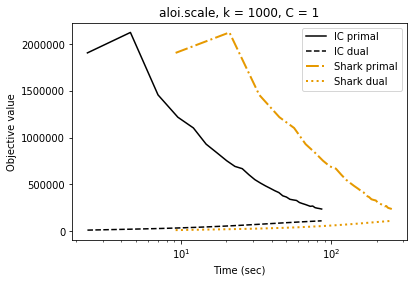

In [257]:

fig, ax = plt.subplots()
ax.semilogx(df_ours['time'],\
            df_ours['primal obj'],\
            linestyle='-', \
            color='k')
ax.semilogx(df_ours['time'], \
            df_ours['dual obj'], \
            linestyle='--', \
            color='k')

orange = (0.9,0.6,0)
ax.semilogx(df_shark['time'], \
            df_shark['primal obj'], \
            linestyle = '-.', \
            color = orange,\
            linewidth = 2)
ax.semilogx(df_shark['time'],\
            df_shark['dual obj'],\
            linestyle = ':', \
            color = orange,\
            linewidth = 2)


plt.xlabel("Time (sec)")
plt.ylabel("Objective value")
plt.title(ds + ', k = ' + str(nr_classes[ds]) +', C = ' +str(reg))
ax.legend(['IC primal','IC dual','Shark primal','Shark dual'])
plt.savefig('../figures/' + get_exp_name(ds,reg)+'_ob.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


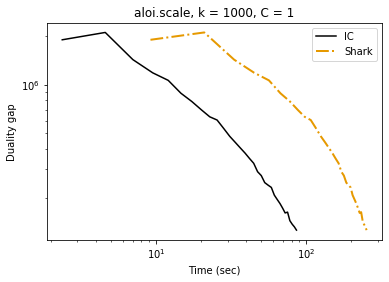

In [258]:


fig, ax = plt.subplots()
ax.loglog(df_ours['time'],\
            df_ours['duality gap'],\
            linestyle='-', \
            color='k')

orange = (0.9,0.6,0)
ax.loglog(df_shark['time'],\
            df_shark['duality gap'],\
            linestyle = '-.', \
            color = orange,\
            linewidth = 2)

plt.xlabel("Time (sec)")
plt.ylabel("Duality gap")
plt.title(ds + ', k = ' + str(nr_classes[ds]) +', C = ' +str(regs[ds]))
ax.legend(['IC','Shark'])
plt.savefig('../figures/' + get_exp_name(ds,reg)+'_dg.eps',format='eps')